In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('twitter_sentiments.csv')
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
data.shape

(31962, 3)

In [4]:
data.isnull().any()

id       False
label    False
tweet    False
dtype: bool

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [6]:
print("Hate Tweets: ", len(data[data['label']==1]))
print("Non Hate Tweets: ", len(data[data['label']==0]))

Hate Tweets:  2242
Non Hate Tweets:  29720


<function matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)>

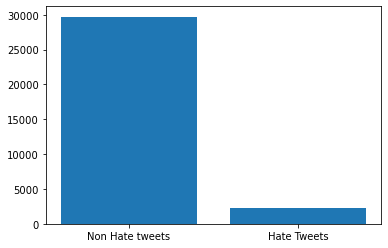

In [7]:
x=["Non Hate tweets", "Hate Tweets"]
y=[len(data[data['label']==0]),len(data[data['label']==1])]
plt.bar(x,y)
plt.bar

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(data['tweet']).toarray()
Y = data.iloc[:, 1].values
print(Y)

[0 0 0 ... 0 1 0]


In [10]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [11]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [12]:
y_pred = classifier.predict(x_test)

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[5915   70]
 [ 229  179]]


0.9532300954168622

In [16]:
# Save the model
import pickle

Pkl_Filename = "Hate_tweet.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(classifier, file)

In [17]:
# Load the Model back from file
with open('Hate_tweet.pkl', 'rb') as file:  
    Model = pickle.load(file)

Model

SVC(kernel='linear', random_state=0)